In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
noisy_matrix[1,1]=np.nan
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.42054519 0.34146364 0.18742885 ... 0.43844586 0.21867251 0.7466727 ]
 [0.29143022 0.23662813 0.12988481 ... 0.30383506 0.1515361  0.51743069]
 [0.23316541 0.18931975 0.10391731 ... 0.24309019 0.12123992 0.41398226]
 ...
 [0.00590641 0.00479574 0.00263237 ... 0.00615782 0.00307118 0.01048676]
 [0.36358449 0.29521413 0.16204257 ... 0.3790606  0.18905444 0.64553969]
 [0.30652956 0.24888811 0.13661429 ... 0.31957711 0.15938736 0.54423938]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.31485946  0.29032288  0.22228308 ...  0.54562074  0.17545714
   0.99295687]
 [ 0.28363683         nan  0.04786598 ...  0.32849475 -0.04113217
   0.38320307]
 [ 0.28952409  0.1435549   0.22062092 ...  0.31328246  0.15040266
   0.41125229]
 ...
 [-0.12433268 -0.0230526  -0.08741872 ... -0.11400729  0.11421585
  -0.01567303]
 [ 0.20497734  0.25060131 -0.08437721 ...  0.24047763  0.13443564
   0.88709633]
 [ 0.23459075  0.1743867   0.06936569 ...  0.34345445  0.15907862
   0.51

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "norm",
               prior_F = "norm")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.078289
[IterativeSVD] Iter 2: observed MAE=0.074924
[IterativeSVD] Iter 3: observed MAE=0.069444
[IterativeSVD] Iter 4: observed MAE=0.057910
[IterativeSVD] Iter 5: observed MAE=0.052694
[IterativeSVD] Iter 6: observed MAE=0.052695
[IterativeSVD] Iter 7: observed MAE=0.052696
[IterativeSVD] Iter 8: observed MAE=0.052696
[IterativeSVD] Iter 9: observed MAE=0.052697
[IterativeSVD] Iter 10: observed MAE=0.052697


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.078289
[IterativeSVD] Iter 2: observed MAE=0.074924
[IterativeSVD] Iter 3: observed MAE=0.069444
[IterativeSVD] Iter 4: observed MAE=0.057910
[IterativeSVD] Iter 5: observed MAE=0.052694
[IterativeSVD] Iter 6: observed MAE=0.052695
[IterativeSVD] Iter 7: observed MAE=0.052696
[IterativeSVD] Iter 8: observed MAE=0.052696
[IterativeSVD] Iter 9: observed MAE=0.052697
[IterativeSVD] Iter 10: observed MAE=0.052697
[ 0.06465759 -0.19741388  0.09430846  0.09974544 -0.18231861  0.38145024
 -0.06059539  0.19253478 -0.18205161  0.11162657  0.06390987  0.16182838
 -0.0592455   0.18844921  0.26739804 -0.00296941  0.05918072 -0.03133746
 -0.09074779 -0.03043466 -0.06072254  0.16439661  0.11420656  0.11460874
  0.22074323 -0.20781721  0.29682087  0.15231924 -0.32492781 -0.13791695
  0.37687116 -0.48393723 -0.10551396  0.08212141 -0.13759611  0.16412954
 -0.10032135  0.06342905  0

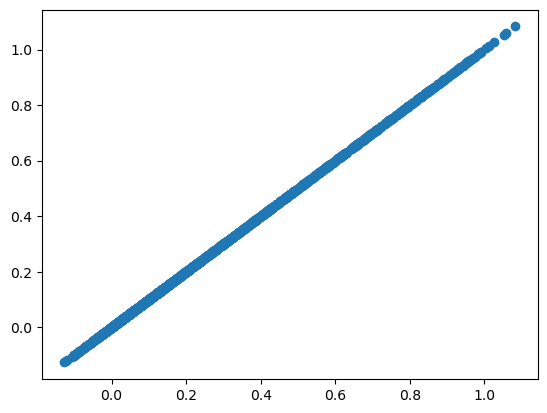

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

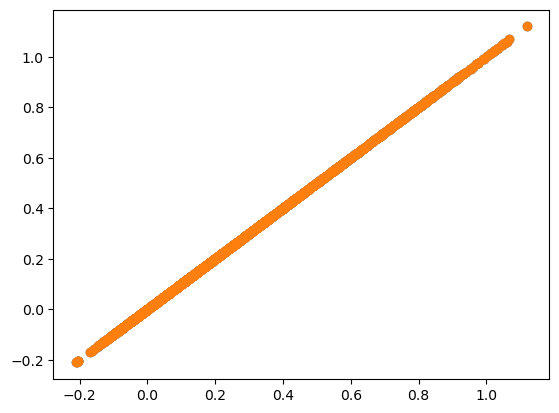

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696],
       [0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696],
       [0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696],
       ...,
       [0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696],
       [0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696],
       [0.00682696, 0.00682696, 0.00682696, ..., 0.00682696, 0.00682696,
        0.00682696]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

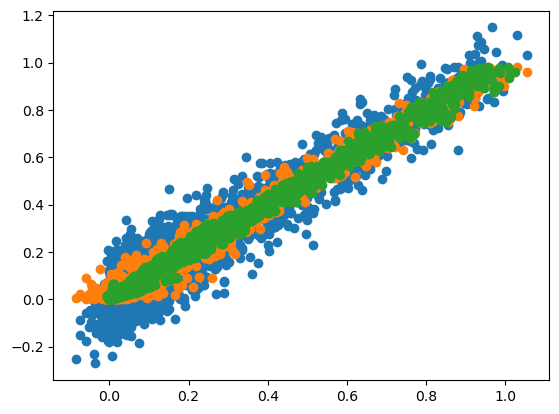

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

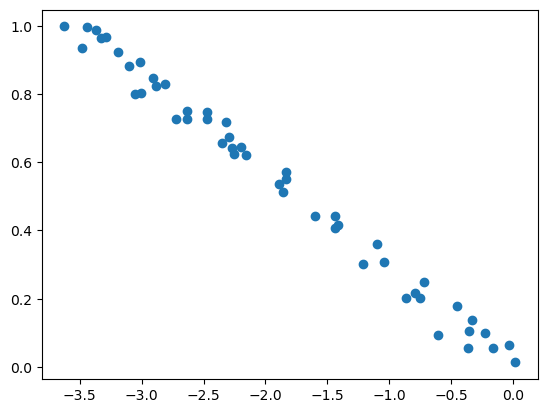

In [11]:
plt.scatter(mycebmf.L[:,0], u)

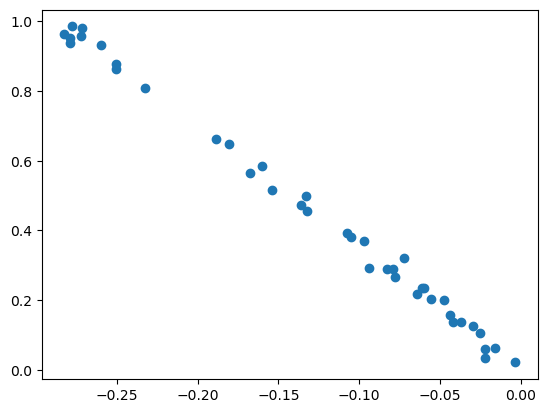

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([-170,  -32,  -32,  -31,  -27])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

34.95764676521085

In [17]:
mycebmf.tau

array([[116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694],
       [116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694],
       [116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694],
       ...,
       [116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694],
       [116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694],
       [116.39717694, 116.39717694, 116.39717694, ..., 116.39717694,
        116.39717694, 116.39717694]])

In [18]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[-164  -16  -18  -15  -12]
[-138  -16  -12   -8   -7]


In [19]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1826.704624234214
[-164  -16  -18  -15  -12]
[-138  -16  -12   -8   -7]
106.21820328966571
-2241.1253801262105
[inf, 1386.171650010531, 1420.7046243283128]


In [20]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 1386.171650010531, 1420.7046243283128, 1450.8146369420838]


In [21]:
for i in range(20):
    mycebmf.iter()



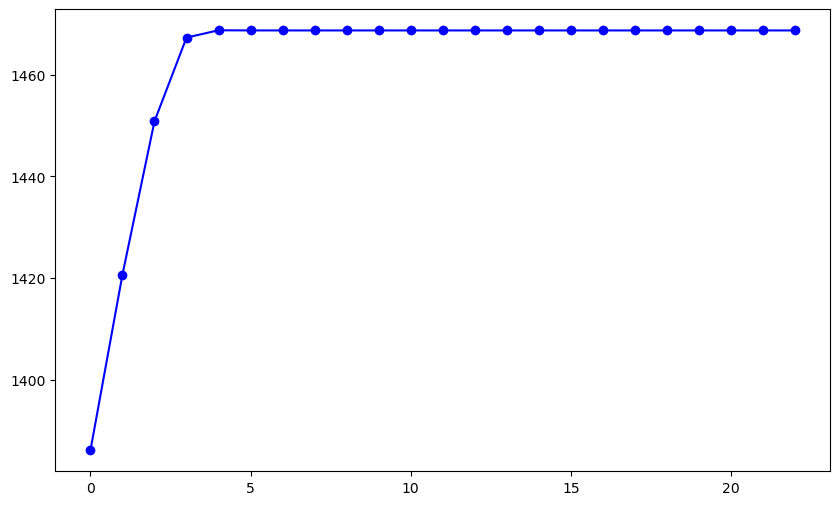

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

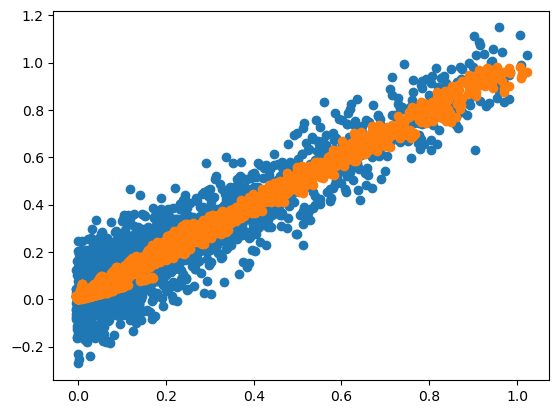

In [23]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
